<a href="https://colab.research.google.com/github/jessicamotam/AvantiBootcamp_ML/blob/main/ML_Classificacao_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapa 1: importar dataset do Kaggle

In [32]:
#baixando datasets do kaggle e instalando o pandas
!pip install opendatasets
!pip install pandas

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [33]:
import opendatasets as od
import pandas

#importando dataset do COVID
od.download("https://www.kaggle.com/datasets/maedemaftouni/covid19-ct-scan-lesion-segmentation-dataset/data")

Skipping, found downloaded files in "./covid19-ct-scan-lesion-segmentation-dataset" (use force=True to force download)


In [34]:
# listando arquivos e pastas que tem no dataset
!ls

covid19-ct-scan-lesion-segmentation-dataset  sample_data


## Etapa 2: criando dataframe com os metadados da imagem

In [35]:
#importando biblioteca do OPEN CV(biblioteca para processamento de imagem e visão computacional)
  ## cv2 vai permitir tarefas de leitura e gravação de imagens, manipulação de imagens(redimensioamento, transformação e rotação), detecção de objetos, reconhecimento facial
import cv2

#biblioteca para acessar e manipular o sistema de arquivos
import os

In [46]:
# caminho para do diretório no sistema da base do covid / acessando a PASTA FRAMES

root_dir = './covid19-ct-scan-lesion-segmentation-dataset'

In [37]:
#intalando a biblioteca ImageHash -> usada para calculas hashes de imagens

!pip install ImageHash

In [38]:
#bibliotecas

import pandas as pd #manipulação de dados
import imagehash #calcula hashes de imagens(verifica similaridades ou detecta imagens corrompidas)
import matplotlib.pyplot as plt #visualização de graficos
%matplotlib inline
# exibe e gera os gráficos dentro do colab, na célula de baixo

from PIL import Image # importa a biblioteca PIL para manipulação de imagens
contar_imagens_corrompidas = 0
imagens_corrompidas = list() #armazena as imagens corrompidas

In [58]:
dataframe_list = list()

for folder in os.listdir(root_dir):  # Acessando as pastas do diretório
    child_dir = os.path.join(root_dir, folder)

    for image in os.listdir(child_dir):  # Acessando as imagens das pastas
        img_dir = os.path.join(child_dir, image)
        # print(f"Lendo a imagem: {img_dir}")  # Verificando se está lendo todas as imagens das duas pastas

        img = cv2.imread(img_dir)

        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_pill = Image.fromarray(img_rgb)

            # Gerando hash da imagem
            img_hash = imagehash.phash(img_pill)
            width, height, channels = img.shape
            img_corrupted = False

            # Adiciona informações da imagem ao dataframe_list
            dataframe_list.append([img_dir, img_corrupted, img_hash, image.split('.')[-1], width, height, channels, folder])
        else:
            contar_imagens_corrompidas += 1
            imagens_corrompidas.append(img_dir)
            img_corrupted = True
            img_hash, image_format, width, height, channels = None, None, None, None, None



## Mostrando se tem imagens corrompidas no DF

In [61]:
print(f'QUANTIDADE DE IMAGENS CORROMPIDAS: {contar_imagens_corrompidas}')

print(f'IMAGENS CORROMPIDAS: {imagens_corrompidas}')

print(f'Total de imagens válidas adicionadas: {len(dataframe_list)}')

QUANTIDADE DE IMAGENS CORROMPIDAS: 0
IMAGENS CORROMPIDAS: []
Total de imagens válidas adicionadas: 5458


In [60]:
df = pd.DataFrame(data=dataframe_list, columns=['image_path', 'imagens_corrompidas', 'image_hash', 'image_format', 'width', 'height', 'channels', 'label'])

df.head()

,image_path,imagens_corrompidas,image_hash,image_format,width,height,channels,label
0,./covid19-ct-scan-lesion-segmentation-dataset/...,False,c63839c63839c7ce,png,512,512,3,masks
1,./covid19-ct-scan-lesion-segmentation-dataset/...,False,926d6d92926d6d92,png,512,512,3,masks
2,./covid19-ct-scan-lesion-segmentation-dataset/...,False,c6c2393fc7c03137,png,512,512,3,masks
3,./covid19-ct-scan-lesion-segmentation-dataset/...,False,c3c31e3c30e1e71e,png,512,512,3,masks
4,./covid19-ct-scan-lesion-segmentation-dataset/...,False,8486737b69a5c6c6,png,512,512,3,masks


# **ANÁLISE DOS DADOS**


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5458 entries, 0 to 5457
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   image_path           5458 non-null   object
 1   imagens_corrompidas  5458 non-null   bool  
 2   image_hash           5458 non-null   object
 3   image_format         5458 non-null   object
 4   width                5458 non-null   int64 
 5   height               5458 non-null   int64 
 6   channels             5458 non-null   int64 
 7   label                5458 non-null   object
dtypes: bool(1), int64(3), object(4)
memory usage: 303.9+ KB


 Resultado da análise: 5458 imagens anexadas

In [95]:
# Verificando se tem VALORES NULOS no df

valores_nulos = df.isna().sum()
print('QUANTIDADE DE VALORES NULOS: \n',  valores_nulos)


df.isna()

QUANTIDADE DE VALORES NULOS: 
 image_path             0
imagens_corrompidas    0
image_hash             0
image_format           0
width                  0
height                 0
channels               0
label                  0
dtype: int64


,image_path,imagens_corrompidas,image_hash,image_format,width,height,channels,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
5453,False,False,False,False,False,False,False,False
5454,False,False,False,False,False,False,False,False
5455,False,False,False,False,False,False,False,False
5456,False,False,False,False,False,False,False,False


 Resultado da análise: não há valores nulos


## - Análises Estatísticas

In [78]:
df.describe()

,width,height,channels
count,5458.0,5458.0,5458.0
mean,512.0,512.0,3.0
std,0.0,0.0,0.0
min,512.0,512.0,3.0
25%,512.0,512.0,3.0
50%,512.0,512.0,3.0
75%,512.0,512.0,3.0
max,512.0,512.0,3.0


In [79]:
df.head()

,image_path,imagens_corrompidas,image_hash,image_format,width,height,channels,label
0,./covid19-ct-scan-lesion-segmentation-dataset/...,False,c63839c63839c7ce,png,512,512,3,masks
1,./covid19-ct-scan-lesion-segmentation-dataset/...,False,926d6d92926d6d92,png,512,512,3,masks
2,./covid19-ct-scan-lesion-segmentation-dataset/...,False,c6c2393fc7c03137,png,512,512,3,masks
3,./covid19-ct-scan-lesion-segmentation-dataset/...,False,c3c31e3c30e1e71e,png,512,512,3,masks
4,./covid19-ct-scan-lesion-segmentation-dataset/...,False,8486737b69a5c6c6,png,512,512,3,masks


### Verificando os formatos das imagens que estão no DF





In [98]:
#df['image_format'].unique() #valores únicos

df['image_format'].value_counts()


,count
image_format,
png,5458


 Resultado da análise: todas as imagens são do tipo png

<Axes: title={'center': 'Quantidade de imagens por formato'}, xlabel='image_format'>

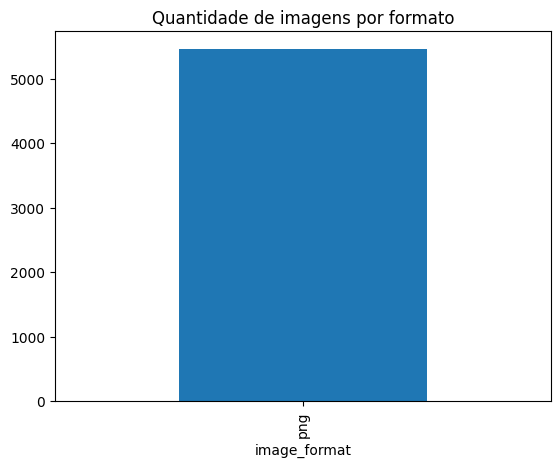

In [97]:
#plotando gráfico de tipos de formato:

df['image_format'].value_counts().plot(kind='bar', title='Quantidade de imagens por formato')

### Distribuição das dimensões de altura e largura das imagens:

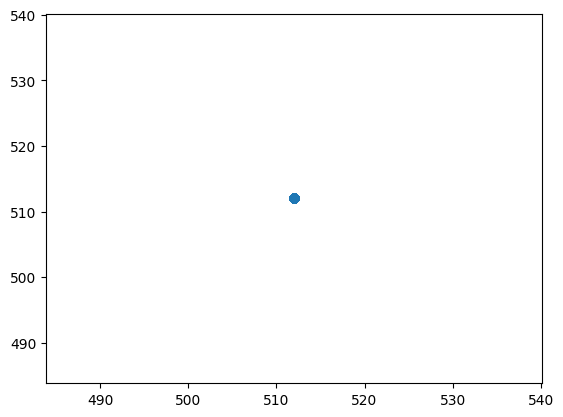

In [102]:
# distribuição das dimensões de altura e largura das imagens:

plt.scatter(df['width'],df['height'])

In [104]:
df[['width','height']]

,width,height
0,512,512
1,512,512
2,512,512
3,512,512
4,512,512
...,...,...
5453,512,512
5454,512,512
5455,512,512
5456,512,512


Resultado da análise: todas as imagens tem dimensão 512 altura x 512 largura

In [109]:
df.columns

Index(['image_path', 'imagens_corrompidas', 'image_hash', 'image_format',
       'width', 'height', 'channels', 'label'],
      dtype='object')

In [111]:
# QAUNTIDADE DE IMAGENS CORROMPIDAS

df['imagens_corrompidas'].sum()

0

### Analisando a quantidade de imagens por Label (pastas que estão as imagens no df)

In [124]:
# Verificando quais são as pastas
df['label'].unique()

array(['masks', 'frames'], dtype=object)

<Axes: title={'center': 'Quantidade de imagens por pastas'}, xlabel='label'>

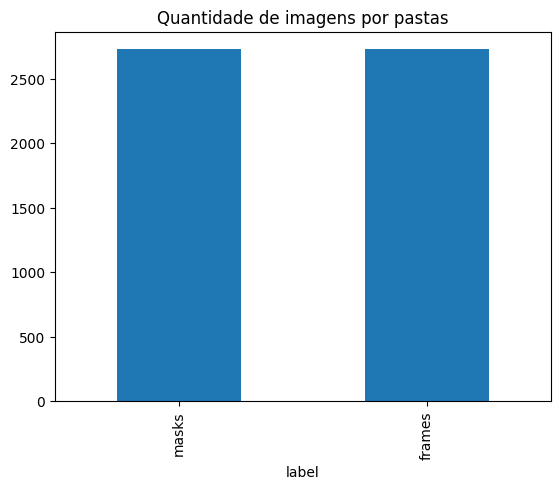

In [125]:
# Verificando a qtde de imagens em cada pasta
df['label'].value_counts().plot(kind='bar', title='Quantidade de imagens por pastas')

In [120]:
qtd_imagens_classe = df['label'].value_counts()
qtd_imagens_classe


,count
label,
masks,2729
frames,2729


Resultado da análise: nas duas classes há a mesma quantidade de imaagens(2729)

## # Verificando se existe imagens **duplicadas**

In [128]:
# Verificando se tem imagens duplicadas

duplicadas = df['image_hash'].duplicated().sum()


print('QUANTIDADE DE IMAGENS DUPLICADAS:', duplicadas)

QUANTIDADE DE IMAGENS DUPLICADAS: 2035


In [131]:
# Quais são as imagens duplicadas??? Pq elas estão duplicadas???
df_duplicadas = df[df['image_hash'].duplicated()]
df_duplicadas

,image_path,imagens_corrompidas,image_hash,image_format,width,height,channels,label
10,./covid19-ct-scan-lesion-segmentation-dataset/...,False,9669699696696996,png,512,512,3,masks
34,./covid19-ct-scan-lesion-segmentation-dataset/...,False,c73838c7c73838c7,png,512,512,3,masks
70,./covid19-ct-scan-lesion-segmentation-dataset/...,False,c3303ccfc3303ccf,png,512,512,3,masks
89,./covid19-ct-scan-lesion-segmentation-dataset/...,False,c73838c7c73838c7,png,512,512,3,masks
94,./covid19-ct-scan-lesion-segmentation-dataset/...,False,963d69c2963d4bc2,png,512,512,3,masks
...,...,...,...,...,...,...,...,...
5450,./covid19-ct-scan-lesion-segmentation-dataset/...,False,d1cd06926b6b3c3c,png,512,512,3,frames
5451,./covid19-ct-scan-lesion-segmentation-dataset/...,False,999147c66e7a34b1,png,512,512,3,frames
5452,./covid19-ct-scan-lesion-segmentation-dataset/...,False,c5b156d7392c62e4,png,512,512,3,frames
5453,./covid19-ct-scan-lesion-segmentation-dataset/...,False,999907c6642f5af4,png,512,512,3,frames


In [133]:
imagens_duplicadas = {}

for imagem in range(df_duplicadas.shape[0]):
  hash_duplicadas = df_duplicadas.iloc[imagem]['image_hash']
  duplicadas = df[df['image_hash'] == hash_duplicadas]['image_path'].value_counts()
  imagens_duplicadas[str(hash_duplicadas)] = duplicadas.tolist()


In [135]:
imagens_duplicadas

{'9669699696696996': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'c73838c7c73838c7': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'c3303ccfc3303ccf': [1, 1, 1, 1, 1, 1, 1, 1],
 '963d69c2963d4bc2': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 '926d6d92926d6d92': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'a7385ac7b54a4a3c': [1, 1],
 '9669699669699669': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'c7c731383838cec7': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
 

## REPOSTA DA ANÁLISE ANTERIOR: no frame e na masks tem as mesmas imagens